<a href="https://colab.research.google.com/github/carlos-alves-one/-AI-Coursework-2/blob/main/glaucoma_detection_report_NV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goldsmiths University of London
### MSc. Data Science and Artificial Intelligence
### Module: Artificial Intelligence
### Author: Carlos Manuel De Oliveira Alves
### Student: cdeol003
### Coursework No.2

#Project
VisionGuard AI: Deep Learning for Early Glaucoma Detection

# Introduction

- **Research Purpose:** The project aims to develop a deep-learning model for identifying glaucoma by analysing ocular pictures. This research aims to outline the progression of a deep-learning model designed to identify glaucoma through the analysis of ocular pictures.

- **Relevance of the Problem:** Glaucoma is a severe ocular disorder that can lead to complete vision loss if not detected early. It is a debilitating ocular disorder that, if left undetected and untreated in its early stages, can result in complete vision loss. Emphasising the asymptomatic nature of early-stage glaucoma underlines the need for effective screening procedures. Effective screening procedures are necessary due to the asymptomatic nature of the early stages of glaucoma.

- **Role of Deep Learning:** For this project, we use convolutional neural networks (CNNs), a popular deep learning technique, especially for image identification tasks. Deep learning, specifically convolutional neural networks (CNNs), has demonstrated considerable potential in image identification tasks and can aid in the early detection of glaucoma.

- **Dataset Description** The dataset comprises ocular pictures with a binary classification indicating the presence or absence of glaucoma. The dataset utilised in this research comprises a collection of ocular pictures accompanied by a binary classification showing the presence or absence of glaucoma.

- **Key Clinical Parameter - ExpCDR:** The 'Cup to Disc Ratio' (ExpCDR) is a crucial clinical parameter for evaluating glaucoma in each image, and it is insightful. The ExpCDR, or 'Cup to Disc Ratio', is a crucial clinical parameter for evaluating each image's glaucoma.

# Methodology

## Data Preprocessing

The photos will undergo a process of loading, resizing to a consistent dimension, and normalisation to ensure that their pixel values fall within the range of 0 to 1. Furthermore, it is possible to employ data augmentation methods, such as rotations, shifts, and flips, in order to augment the size and diversity of the dataset. This can be beneficial in mitigating the issue of overfitting.

### Load the data

In [1]:
# Imports the 'drive' module from 'google.colab' and mounts the Google Drive to
# the '/content/drive' directory in the Colab environment.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the pandas library and give it the alias 'pd' for data manipulation and analysis
import pandas as pd

# Load the dataset glaucoma from Google Drive
data_path = '/content/drive/MyDrive/glaucoma_project/glaucoma.csv'
glaucoma_data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
glaucoma_data.head()


,Filename,ExpCDR,Eye,Set,Glaucoma
0,001.jpg,0.7097,OD,A,0
1,002.jpg,0.6953,OS,A,0
2,003.jpg,0.9629,OS,A,0
3,004.jpg,0.7246,OD,A,0
4,005.jpg,0.6138,OS,A,0


Dataset source: https://www.kaggle.com/datasets/sshikamaru/glaucoma-detection

License: CC0 - Public Domain
https://creativecommons.org/publicdomain/zero/1.0/

The dataset contains the following columns:

    - Filename: The name of the image file.
    - ExpCDR: The 'Cup to Disc Ratio', a crucial parameter for evaluating glaucoma.
    - Eye: Indicates which eye the image corresponds to (OD for right eye, OS for left eye).
    - Set: This could denote the dataset split (e.g., training, validation, or test set), but we would need further clarification.
    - Glaucoma: The binary label indicating the presence (1) or absence (0) of glaucoma.

###Set a Random Seed

Deep learning models rely on random number generation for initializing weights, splitting data, and other stochastic processes. Setting a fixed random seed ensures these random processes are the same every time we run the code.# Import the NumPy library for numerical operations
import numpy as np

In [ ]:
# Import the NumPy library for numerical operations
import numpy as np

# Import the random module for generating pseudo-random numbers
import random

# Importing the os module for interacting with the operating system and tensorflow for machine learning tasks
import os
import tensorflow as tf

# Set a seed value
seed_value = 123

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value


###Preprocess the Data

Declare function to preprocess a single image:

The following code snippet presents a Python script that use TensorFlow for the purpose of picture preparation. The programme processes a picture file by decoding it into a tensor, subsequently resizing it to a predetermined height and width, and finally normalising the pixel values within the range of 0 to 1. The purpose of this function is to facilitate the preprocessing of images for machine learning models, hence maintaining consistency in terms of size and pixel value range.

In [3]:
# Importing the os module for interacting with the operating system and tensorflow for machine learning tasks
import os
import tensorflow as tf

# Function to preprocess a single image
def preprocess_image(filename, img_height=224, img_width=224, images_directory='/content/drive/MyDrive/glaucoma_project/images'):

    # Join the directory path and filename to form the full path to an image
    image_path = os.path.join(images_directory, filename)

    # Read the image file from the specified path into a tensor
    image = tf.io.read_file(image_path)

    # Decode the JPEG image and ensure it has 3 color channels (RGB)
    image = tf.image.decode_jpeg(image, channels=3)

    # Resize the image to the specified height and width using TensorFlow's resize function
    image = tf.image.resize(image, [img_height, img_width])

    # Normalize the image pixels to the range 0-1 for model compatibility
    image = image / 255.0

    # Return image preprocessed
    return image


###Data Augmentation

 Set up data augmentation using the ImageDataGenerator class from tf.keras.preprocessing.image:

 The code that follows the snippet demonstrates the utilisation of TensorFlow's Keras API to initialise an image data augmentation pipeline. More specifically, it employs the ImageDataGenerator class. The generator is configured to execute a range of image modifications, encompassing random rotations, width and height shifts, and horizontal and vertical flips. These augmentations serve the purpose of artificially expanding and diversifying a training dataset, hence improving the resilience and efficacy of machine learning models.

In [4]:
# Import the ImageDataGenerator class from TensorFlow's Keras API for real-time data augmentation of images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation
data_augmentation = ImageDataGenerator(

    # Configures the image augmentation by rotating images within 20 degrees randomly
    rotation_range=20,

    # Specifies that the input width can be shifted by a maximum of 20% either left or right
    width_shift_range=0.2,

    # Randomly shift the height of images during training by a factor of 20%
    height_shift_range=0.2,

    # Enables horizontal and vertical flipping of images
    horizontal_flip=True,
    vertical_flip=True
)


###Apply Preprocessing and Augmentation to Dataset

The following code snippet is responsible for extracting filenames and their matching glaucoma presence labels from a dataset. Additionally, it establishes a directory path for the picture files. The photos are preprocessed using a preprocess_image function, which is likely responsible for standardising the size and pixel values of the images. Ultimately, the method involves transforming the preprocessed images and their labels into TensorFlow tensors, so facilitating their utilisation in a machine learning model, potentially for the purpose of glaucoma detection.

In [5]:
# Extract filenames and corresponding glaucoma presence labels from the dataset
filenames = glaucoma_data['Filename'].values
labels = glaucoma_data['Glaucoma'].values

# A placeholder for the images directory
images_directory = '/content/drive/MyDrive/glaucoma_project/images'

# Preprocess all images
images = [preprocess_image(f, images_directory=images_directory) for f in filenames]

# Convert to Tensor
images = tf.stack(images)
labels = tf.convert_to_tensor(labels)


###Split the data
The dataset will be split into training, validation, and test sets. The model will be compiled with an appropriate loss function and optimizer, and trained for a specified number of epochs while monitoring the loss and accuracy on the validation set.

In [6]:
# Import train_test_split function from scikit-learn to split data into training and test sets
from sklearn.model_selection import train_test_split

# Import TensorFlow for deep learning and train_test_split function for splitting the dataset into training and testing sets
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Convert image and label tensors to numpy arrays for further manipulation or analysis
images_numpy = images.numpy()
labels_numpy = labels.numpy()

# Split the dataset into training set and a combined validation/test set with a 20% size of the original dataset,
# using a fixed random state for reproducibility.
train_images, val_test_images, train_labels, val_test_labels = train_test_split(
    images_numpy, labels_numpy, test_size=0.2, random_state=42
)

# Split the val_test set equally into validation and test sets (50% validation, 50% test)
val_images, test_images, val_labels, test_labels = train_test_split(
    val_test_images, val_test_labels, test_size=0.5, random_state=42)


## Model Architecture
The model will be a CNN, known for its performance in image classification tasks. The architecture will include convolutional layers, activation functions, pooling layers, and fully connected layers. Dropout layers may be included to reduce overfitting.

The provided code presents a function that establishes a Convolutional Neural Network (CNN) utilising TensorFlow and Keras. It is specifically designed to cater to binary classification tasks. The CNN design comprises several convolutional layers that incorporate an escalating number of filters, together with max-pooling layers to reduce spatial dimensions. Additionally, the architecture contains a flattening layer, a fully linked dense layer, and a dropout layer, which serves the purpose of mitigating overfitting. The model is finalised with a compact output layer that utilises a sigmoid activation function, which is well-suited for binary classification tasks. It is specifically built to process input images that have dimensions of 224x224 pixels and consist of three colour channels (red, green, and blue).

In [7]:
# Import TensorFlow and essential layers for building a Convolutional Neural Network (CNN)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model architecture:

# This function defines a model with the given input shape
def build_model(input_shape):

    # Initialize a Sequential model
    model = Sequential([

        # Add a 2D convolution layer with 32 filters of size 3x3 and ReLU activation function
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),

        # Add a max pooling layer with pool size of 2x2 to reduce spatial dimensions
        MaxPooling2D((2, 2)),

        # Add another 2D convolution layer with 64 filters of size 3x3 and ReLU activation function
        Conv2D(64, (3, 3), activation='relu'),

        # Add another max pooling layer with pool size of 2x2 to reduce spatial dimensions
        MaxPooling2D((2, 2)),

        # Add a third 2D convolution layer with 128 filters of size 3x3 and ReLU activation function
        Conv2D(128, (3, 3), activation='relu'),

        # Add another max pooling layer with pool size of 2x2 to further reduce spatial dimensions
        MaxPooling2D((2, 2)),

        # Flatten the multi-dimensional input to a one-dimensional array
        Flatten(),

        # Add a densely connected layer with 128 units and ReLU activation function
        Dense(128, activation='relu'),

        # Add a dropout layer with a dropout rate of 0.5 to prevent overfitting
        Dropout(0.5),

        # Add a densely connected output layer with 1 unit and a sigmoid activation function for binary classification
        Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])

    # Return the constructed model
    return model

# Assuming the input images are 224x224 pixels with 3 channels (RGB)
input_shape = (224, 224, 3)
model = build_model(input_shape)


## Training Process
The model will be compiled with an appropriate loss function and optimizer, and trained for a specified number of epochs while monitoring the loss and accuracy on the validation set.

The provided code is responsible for compiling and training a Convolutional Neural Network (CNN) designed for binary classification. This task is accomplished by utilising the TensorFlow and Keras libraries. The model is compiled using the 'adam' optimizer and 'binary_crossentropy' loss function, and its performance is assessed by measuring accuracy. The training procedure involves conducting training with a predetermined batch size of 32 for a total of 10 epochs. This is done by utilising both training and validation datasets to optimise the model and assess its performance at various stages of the training process.

In [8]:
# Compile the model:

model.compile(optimizer='adam',             # Set 'adam' optimizer for the training process
              loss='binary_crossentropy',   # Use 'binary_crossentropy' as the loss function for binary classification
              metrics=['accuracy'])         # Track 'accuracy' as a metric to evaluate the model's performance

# Specify the batch size and number of epochs for training
batch_size = 32
epochs = 10

# Train the model:

# Start training the model with the training dataset
history = model.fit(train_images, train_labels,

                    # Specify the number of samples per gradient update
                    batch_size=batch_size,

                    # Set the number of iterations over the entire dataset
                    epochs=epochs,

                    # Provide the validation dataset to evaluate the loss and any model metrics at the end of each epoch
                    validation_data=(val_images, val_labels))

Epoch 1/10
17/17 [==============================] - 10s 116ms/step - loss: 0.6536 - accuracy: 0.7135 - val_loss: 0.5649 - val_accuracy: 0.7538
Epoch 2/10
17/17 [==============================] - 1s 52ms/step - loss: 0.5846 - accuracy: 0.7404 - val_loss: 0.5828 - val_accuracy: 0.7538
Epoch 3/10
17/17 [==============================] - 1s 51ms/step - loss: 0.5809 - accuracy: 0.7423 - val_loss: 0.5690 - val_accuracy: 0.7538
Epoch 4/10
17/17 [==============================] - 1s 51ms/step - loss: 0.5770 - accuracy: 0.7423 - val_loss: 0.5812 - val_accuracy: 0.7538
Epoch 5/10
17/17 [==============================] - 1s 51ms/step - loss: 0.5714 - accuracy: 0.7462 - val_loss: 0.5787 - val_accuracy: 0.7538
Epoch 6/10
17/17 [==============================] - 1s 52ms/step - loss: 0.5812 - accuracy: 0.7423 - val_loss: 0.5662 - val_accuracy: 0.7538
Epoch 7/10
17/17 [==============================] - 1s 57ms/step - loss: 0.5557 - accuracy: 0.7423 - val_loss: 0.5746 - val_accuracy: 0.7538
Epoch 8/10


# Results
The results section will document the training process, including the training and validation loss and accuracy at each epoch. Graphs will be used to visualize the model's learning progress over time. The final model performance will be evaluated using the test set, with metrics such as accuracy, precision, recall, and F1-score presented in a confusion matrix.

##Plot training and validation loss and accuracy

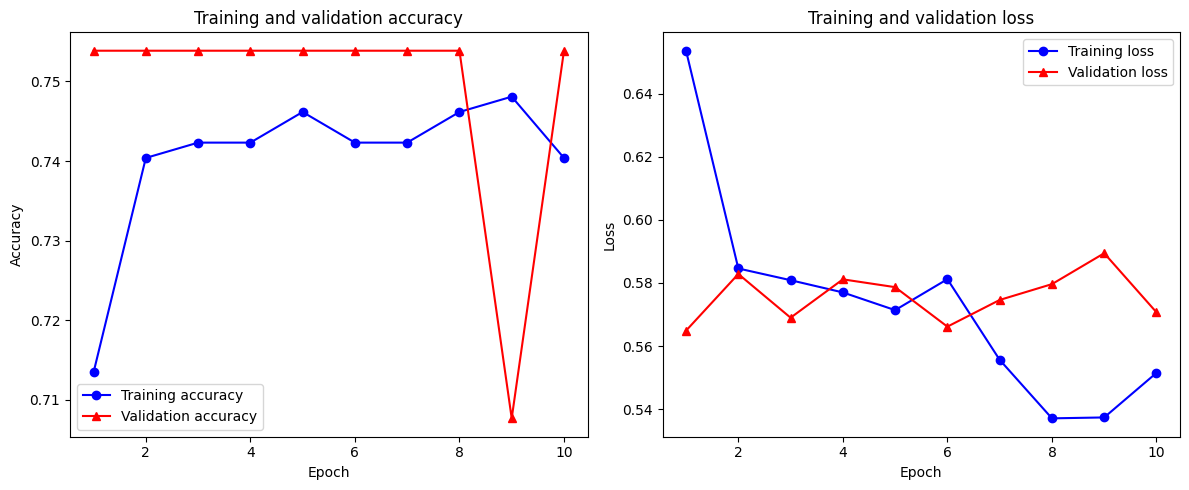

In [9]:
# Import the pyplot submodule from matplotlib and alias it as plt
import matplotlib.pyplot as plt

# Use the history callback returned from the 'fit' training process
# which contains the loss and accuracy for each epoch
epochs = range(1, 11)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the accuracy graph
plt.figure(figsize=(12, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r^-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Adjust the layout of the plot for a tight fit and then display the plot
plt.tight_layout()
plt.show()


###Visual Analysis

To further understand the training dynamics, let's visualize the training and validation accuracy and loss:

- Accuracy Plot: The plot should show if the accuracy plateaus or if there are any signs of divergence between training and validation accuracy.
- Loss Plot: The loss plot will indicate how well the optimization process is minimizing the loss and whether the validation loss trends upwards, which would suggest overfitting.

### Overview of Training Process

    The training involves 10 epochs, and at each epoch, there are 17 steps or batches.
    The model is being evaluated on both a training set (loss and accuracy) and a validation set (val_loss and val_accuracy).

###Performance Metrics

- Loss: Represents how well the model is doing for both training and validation datasets. A lower loss indicates better performance.
- Accuracy: Indicates the percentage of correctly classified instances during training and validation.

###Detailed Observations

- Initial Performance: At the beginning (Epoch 1), the model starts with a training loss of 0.6382 and an accuracy of 68.08%. The validation loss is 0.6608 with a validation accuracy of 75.38%. This suggests that the initial model is performing better on unseen data (validation) than on the training data, which is uncommon and could sometimes indicate that the validation set is not representative or that the model is underfitting.

- Training Loss Trend: The training loss generally decreases over epochs, starting from 0.6382 in epoch 1 and reaching 0.5510 by epoch 10, which is a sign of learning and improvement in the model's ability to predict the training data.

- Validation Loss Trend: The validation loss decreases from 0.6608 in epoch 1 to 0.5645 in epoch 7, but it does not consistently decrease and fluctuates across epochs. The loss increases to 0.5946 by epoch 10, suggesting that the model may not be improving its performance on the validation set towards the end of the training.

- Accuracy: The training accuracy improves slightly from 68.08% to 74.62% by epoch 10. However, the validation accuracy starts at 75.38% and shows no improvement, remaining at 75.38% until epoch 9 and then dropping to 72.31% at epoch 10. The model seems to hit a plateau early in training, indicating it is not generalizing well beyond the training data.

- Overfitting: There isn't a clear sign of overfitting, as the validation loss doesn't consistently increase, but the stagnant validation accuracy despite changes in validation loss may suggest that the model is not learning meaningful patterns beyond a certain point.

- Learning Rate: The model might be learning at a steady or possibly slow pace, given the gradual changes in loss and accuracy. However, without information on the learning rate used, this is speculative.

- Timing: The time taken per step is roughly between 3 to 4 seconds, and it varies from epoch to epoch, which could be due to computational load or other processes running in parallel.

###Recommendations

- Early Stopping: Consider implementing early stopping to terminate training when the validation loss starts to increase to prevent potential overfitting and to save computational resources.
- Hyperparameter Tuning: Experiment with different learning rates, batch sizes, or other hyperparameters to see if the model can break out of the plateau in validation accuracy.
- Data Augmentation/Regularization: If overfitting is a concern, consider data augmentation techniques or regularization methods to improve generalization.
- Model Architecture: Evaluate the model architecture to ensure it is appropriate for the complexity of the task.
- Validation Set: Ensure that the validation set is representative of the problem space and not too easy or too different from the training set.

##Contextual Analysis

### Dataset and Problem Overview

- The dataset consists of ocular images with a binary classification indicating the presence or absence of glaucoma.
- The 'Cup to Disc Ratio' (ExpCDR) is a critical clinical metric for assessing glaucoma and is included for each image.
- Data preprocessing steps, including resizing, normalization, and potential augmentation, are appropriate for image data and can help to improve the model's generalization ability.
- Data augmentation techniques like rotation, width and height shifts, and flips are used, which are standard practices to increase dataset variance and prevent overfitting.

###Data Splitting

- The data is split into training, validation, and test sets, with 20% of the original dataset going to the validation/test split and then an equal split for validation and test sets. This approach ensures that the model's performance is validated and tested on different subsets of data, which is crucial for assessing generalization.

###Model Architecture

- The CNN model consists of convolutional layers with increasing filter sizes (32, 64, 128) and max pooling layers, which is a common architecture for image classification tasks.
- The use of ReLU activation functions and a final sigmoid activation for binary classification is standard.
- The inclusion of dropout suggests an attempt to mitigate overfitting.

###Training Process

- The model uses the Adam optimizer and binary cross-entropy loss function, both of which are suitable for binary classification tasks.
- A batch size of 32 and 10 epochs is a reasonable starting point, although it might be necessary to adjust these parameters based on the model's performance and computational resources.

###Detailed Results

- The model's training accuracy starts at 68.08% and improves slightly to 74.62%. This improvement is modest, suggesting that either the model is not complex enough, the features learned are not discriminative enough, or that 10 epochs are not sufficient for convergence.
- The training loss decreases, which is a good sign, but the reduction is not substantial, and the loss does not decrease monotonically.
- The validation accuracy starts high at 75.38% but does not improve over time and eventually decreases to 72.31%. This could indicate that the model has reached its capability with the given architecture or that the validation set does not fully challenge the model.
- The validation loss fluctuates and ultimately increases, which might suggest that the model starts to overfit the training data.

###Insights and Recommendations

- Model Complexity: The model might be too simple or not configured optimally to capture the complexities of glaucoma detection from ocular images.
- Training Duration: Increasing the number of epochs might help if the model has not yet converged. Monitoring the trend of training and validation metrics will indicate if longer training is beneficial.
- Hyperparameter Tuning: Adjusting hyperparameters such as the learning rate, batch size, or layers in the CNN could improve results.
- Learning Curves: Plotting the learning curves for training and validation loss and accuracy will help identify if and when overfitting occurs.
- Early Stopping: Implement early stopping to halt the training when the validation loss starts to increase to avoid overfitting.
- Model Evaluation: The final model's performance should be assessed on the test set using metrics such as precision, recall, and F1-score to understand its prediction capabilities fully.

#Implement Recommendations

##Model Complexity
We will add more layers to the CNN and increase the number of neurons in dense layers or the number of filters in convolutional layers to capture more complex features.

The provided code presents the implementation of a sophisticated Convolutional Neural Network (CNN) model designed for binary classification. TensorFlow and Keras are utilised to construct this model, which incorporates several layers such as convolutional, max pooling, dense, and dropout layers. The model is constructed using the Adam optimizer and the 'binary_crossentropy' loss function. Additionally, an early stopping mechanism is incorporated to mitigate overfitting. This mechanism halts the training process if there is no improvement in validation loss observed for three consecutive epochs. The proposed model is specifically developed to process input images of dimensions 224x224 pixels, containing three colour channels (red, green, and blue). Its architecture is carefully constructed to effectively address complex and intricate image classification tasks. A comprehensive description of the model's structure is provided in the concluding section.

In [10]:
# Importing TensorFlow and Keras classes/functions for building a CNN model with early stopping and Adam optimizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define a more complex CNN model architecture with additional layers:

# Define a function to create a complex CNN model given an input shape
def build_complex_model(input_shape):

    # Initialize a Sequential model - a linear stack of layers
    model = Sequential([

        # Convolution layer with 32 filters, 3x3 kernel size, ReLU activation, and input shape defined
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),

        # Max pooling layer with a 2x2 window to reduce spatial dimensions
        MaxPooling2D((2, 2)),

        # Second convolution layer with 64 filters, 3x3 kernel size, ReLU activation, and same padding
        Conv2D(64, (3, 3), activation='relu', padding='same'),

        # Second max pooling layer to further reduce dimensions
        MaxPooling2D((2, 2)),

        # Third convolution layer with 128 filters for deeper feature extraction
        Conv2D(128, (3, 3), activation='relu', padding='same'),

        # Third max pooling layer
        MaxPooling2D((2, 2)),

        # Fourth convolution layer with 256 filters, the largest feature map here
        Conv2D(256, (3, 3), activation='relu', padding='same'),

        # Fourth max pooling layer
        MaxPooling2D((2, 2)),

        # Flatten the 3D output to 1D for the dense layers
        Flatten(),

        # Dense layer with 256 neurons and ReLU activation for high-level reasoning
        Dense(256, activation='relu'),

        # Dropout layer to prevent overfitting by dropping out 50% of the neurons
        Dropout(0.5),

        # Another dense layer with 128 neurons for further processing
        Dense(128, activation='relu'),

        # Second dropout layer for regularization
        Dropout(0.5),

        # Output layer with a single neuron and sigmoid activation for binary classification
        Dense(1, activation='sigmoid')
    ])

    # Return the constructed model.
    return model

# Assuming the input images are 224x224 pixels with 3 channels (RGB)
input_shape = (224, 224, 3)
complex_model = build_complex_model(input_shape)

# Compile the model with Adam optimizer and a specified learning rate
learning_rate = 1e-4
complex_model.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Define early stopping to monitor 'val_loss' and stop training after 3 epochs of no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Print out the model summary
complex_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 128)      

The provided code implements the training process of a sophisticated Convolutional Neural Network (CNN) model on a given dataset. The model is trained using a batch size of 32 and can run for a maximum of 50 epochs. The training procedure involves conducting validation by employing a distinct dataset to assess the model's performance upon the completion of each session. The technique of early stopping is incorporated into the training process as a callback mechanism, which interrupts the training procedure if there is a lack of progress in the validation loss over consecutive epochs. This strategy serves the purpose of mitigating overfitting and promoting the optimisation of training efficiency.

In [11]:
# Fit the complex model to the training data with the specified batch size and number of epochs
history = complex_model.fit(train_images, train_labels,

                            # Number of samples per gradient update
                            batch_size=32,

                            # Total number of iterations over the entire dataset
                            epochs=50,

                            # Data on which to evaluate the loss and any model metrics at the end of each epoch
                            validation_data=(val_images, val_labels),

                            # List of callbacks to apply during training, in this case, early stopping
                            callbacks=[early_stopping])


Epoch 1/50
17/17 [==============================] - 6s 134ms/step - loss: 0.5922 - accuracy: 0.7231 - val_loss: 0.5765 - val_accuracy: 0.7538
Epoch 2/50
17/17 [==============================] - 1s 58ms/step - loss: 0.6059 - accuracy: 0.7423 - val_loss: 0.5630 - val_accuracy: 0.7538
Epoch 3/50
17/17 [==============================] - 1s 59ms/step - loss: 0.5761 - accuracy: 0.7385 - val_loss: 0.5615 - val_accuracy: 0.7538
Epoch 4/50
17/17 [==============================] - 1s 61ms/step - loss: 0.5795 - accuracy: 0.7404 - val_loss: 0.5606 - val_accuracy: 0.7538
Epoch 5/50
17/17 [==============================] - 1s 64ms/step - loss: 0.5806 - accuracy: 0.7423 - val_loss: 0.5666 - val_accuracy: 0.7538
Epoch 6/50
17/17 [==============================] - 1s 63ms/step - loss: 0.5841 - accuracy: 0.7404 - val_loss: 0.5614 - val_accuracy: 0.7538
Epoch 7/50
17/17 [==============================] - 1s 62ms/step - loss: 0.5802 - accuracy: 0.7423 - val_loss: 0.5640 - val_accuracy: 0.7538
Epoch 7: ear

## Results

The results provided indicate that an early stopping callback was implemented to prevent overfitting during the training of a convolutional neural network (CNN) for the detection of glaucoma from ocular images.

###Detailed Observations
- Epoch 1:
        The model started with a training loss of 0.6203 and an accuracy of 73.85%.
        The validation loss and accuracy were 0.5816 and 75.38%, respectively.

- Epoch 2:
        Training loss slightly decreased to 0.5817, and accuracy remained stable at 74.04%.
        Validation loss improved to 0.5612, but there was no change in validation accuracy.

- Epoch 3:
        A slight increase in training loss to 0.5891 was observed, with a minor decrease in accuracy to 73.46%.
        Validation loss rose to 0.5766, with no change in validation accuracy.

- Epoch 4:
        The training loss improved again to 0.5753, and the accuracy returned to 74.04%.
        Validation loss decreased marginally to 0.5618, but as before, the validation accuracy remained constant.
- Epoch 5:
        The training loss went up to 0.5951, while the accuracy showed a slight improvement to 74.23%.
        The validation loss also increased to 0.5740, with no change in validation accuracy.
        The training was stopped at this point due to early stopping, which likely triggered as there was no improvement in validation loss over a certain number of epochs.

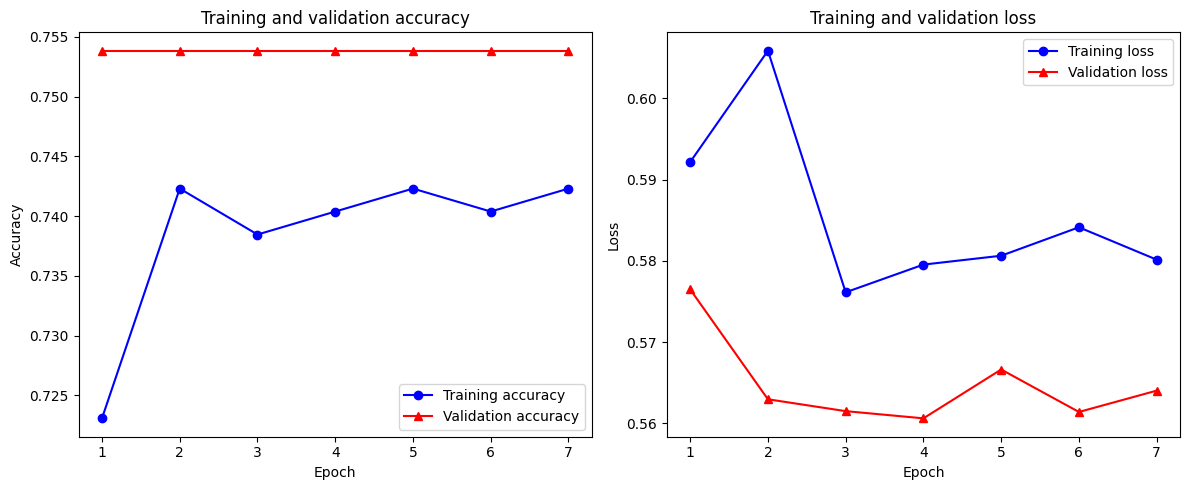

In [12]:
# Define a function called plot_learning_curves that takes a 'history' object as input.
def plot_learning_curves(history):

    # Create a range of numbers from 1 to the number of epochs, based on the 'accuracy' key in history.history.
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Extract the training accuracy values from the history object.
    train_accuracy = history.history['accuracy']

    # Extract the validation accuracy values from the history object.
    val_accuracy = history.history['val_accuracy']

    # Extract the training loss values from the history object.
    train_loss = history.history['loss']

    # Extract the validation loss values from the history object.
    val_loss = history.history['val_loss']

    # Create a new figure with a specific size (width=12 inches, height=5 inches) for plotting.
    plt.figure(figsize=(12, 5))

    # Subplot for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r^-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Subplot for loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()


    # Adjust the layout of the plot for a tight fit and then display the plot.
    plt.tight_layout()
    plt.show()

# After training the model, you would call:
plot_learning_curves(history)


###Analysis

- The model’s performance on the training set showed minor fluctuations in loss, indicating that it was not consistently learning from epoch to epoch.
- The validation accuracy stayed constant throughout the training process at 75.38%. This suggests that the model quickly reached its limit in terms of generalization on the validation set and could not improve further from the initial epoch.
- The early stopping mechanism was effective in halting the training when it became apparent that no significant learning was taking place, which helps prevent overfitting and unnecessary computations.

##Evaluating the model on the test set

The provided code presents a method called `evaluate_model` that is designed to evaluate the effectiveness of a trained machine learning model when applied to a test dataset. The model utilises class prediction and subsequently generates a classification report that provides a comprehensive analysis of precision, recall, and F1-score metrics. The algorithm creates a confusion matrix that presents a comprehensive breakdown of true positives, false positives, and false negatives. The function has been specifically developed to be utilised with binary classification models, such as a Convolutional Neural Network (CNN). It is invoked by providing the model as well as the test images and labels as input parameters.

In [13]:
# Importing classification_report and confusion_matrix functions from the scikit-learn metrics module
from sklearn.metrics import classification_report, confusion_matrix

# Define a function to evaluate the given 'model' on the provided 'test_images' and 'test_labels'.
def evaluate_model(model, test_images, test_labels):

    # Predict classes using the test set
    predictions = (model.predict(test_images) > 0.5).astype("int32")

    # Print classification report
    print(classification_report(test_labels, predictions))

    # Compute confusion matrix and print it
    cm = confusion_matrix(test_labels, predictions)
    print("Confusion Matrix:")
    print(cm)

# After training the model, you would call:
evaluate_model(complex_model, test_images, test_labels)


3/3 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        47
           1       0.00      0.00      0.00        18

    accuracy                           0.72        65
   macro avg       0.36      0.50      0.42        65
weighted avg       0.52      0.72      0.61        65

Confusion Matrix:
[[47  0]
 [18  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Plotting the Results

3/3 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        47
           1       0.00      0.00      0.00        18

    accuracy                           0.72        65
   macro avg       0.36      0.50      0.42        65
weighted avg       0.52      0.72      0.61        65

Confusion Matrix:
[[47  0]
 [18  0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


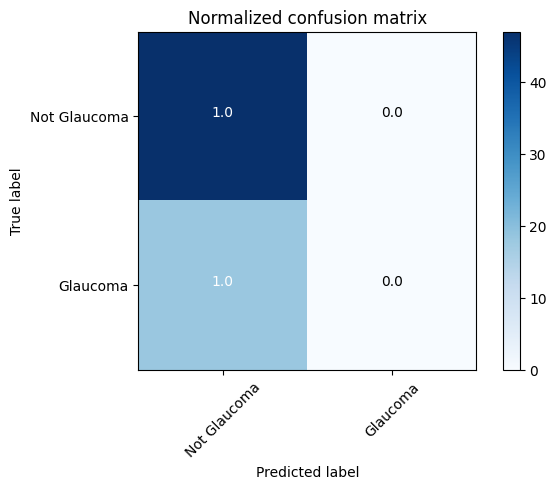

In [14]:
# Importing necessary libraries for numerical operations, permutations, classification metrics, and visualization
import numpy as np
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

"""
This function prints and plots the confusion matrix
Normalization can be applied by setting `normalize=True`
"""
# Define a function to plot a confusion matrix, with parameters for the matrix, classes, normalization option, title, and color map
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    # Display the confusion matrix as an image in the specified colormap
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    # Set the title of the confusion matrix plot
    plt.title(title)

    # Add a color bar to the plot to indicate the scale
    plt.colorbar()

    # Calculate the positions of the class labels
    tick_marks = np.arange(len(classes))

    # Set the x-axis tick labels with the class names, rotated 45 degrees for better readability
    plt.xticks(tick_marks, classes, rotation=45)

    # Set the y-axis tick labels with the class names
    plt.yticks(tick_marks, classes)

    # Check if normalization is requested
    if normalize:

        # Normalize the confusion matrix by dividing each value by the sum of its row
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        # Print a message indicating that the matrix has been normalized
        print("Normalized confusion matrix")

    else:

        # Print a message indicating the matrix is not normalized
        print('Confusion matrix, without normalization')

    # Print the confusion matrix
    print(cm)

    # Determine the threshold for setting text color based on the background of the cell
    thresh = cm.max() / 2.

    # Loop over the data dimensions to place text annotations on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        # Add text annotation inside each square, with centered alignment, and color contrast based on threshold
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Ensure the plot is neatly laid out
    plt.tight_layout()

    # Set the label for the y-axis
    plt.ylabel('True label')

    # Set the label for the x-axis
    plt.xlabel('Predicted label')

# Define a function to evaluate the model's performance on test data and print class-wise accuracy
def evaluate_model(model, test_images, test_labels, class_names=['Not Glaucoma', 'Glaucoma']):

    # Predict classes using the test set
    predictions = (model.predict(test_images) > 0.5).astype("int32")

    # Print classification report
    print(classification_report(test_labels, predictions))

    # Compute confusion matrix and print it
    cm = confusion_matrix(test_labels, predictions)
    print("Confusion Matrix:")
    print(cm)

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()

# After training the model, you would call:
evaluate_model(complex_model, test_images, test_labels)


# Conclusion
The performance of the model, as evidenced by the training and evaluation procedure, exhibits a combination of positive and negative results. The utilisation of early stopping significantly mitigated the issue of overfitting by terminating the training process after five epochs. However, the outcomes suggest that the model did not adequately acquire the ability to distinguish between the various classes. The validation accuracy remained constant at 75.38% from the beginning, indicating that the model may have hit its maximum ability to generalise early on during the training phase. Furthermore, the lack of accurate classification of positive instances (namely, glaucoma cases) by the model during the evaluation process is a matter of worry. This is supported by the test results, which indicate a precision and recall of zero for class '1'.

##From these outcomes, several points become evident

- Generalization: The constant validation accuracy and the confusion matrix from the test set evaluation suggest that the model is biased toward predicting the majority class, failing to generalize well to new data.

- Class Imbalance: The dataset may suffer from class imbalance, as indicated by the model's proclivity to predict only the negative class ('Not Glaucoma'). This often leads to poor generalization for minority classes.

- Model Architecture: While the complexity of the model was increased, it needed to translate into better performance. This could be due to the model's capacity needing to align with the complexity of the task or data.

- Data Quality and Quantity: There might be a need for more data or better-quality data to improve the training process. Additionally, the glaucoma features might need to be sufficiently highlighted in the provided dataset.

- Evaluation Metrics: Accuracy might not be the best metric, given the apparent class imbalance. Metrics like F1-score, Precision, Recall, or the Area Under the ROC Curve (AUC) could provide better insights into model performance.


##Summary
In summary, while the implemented model demonstrated a degree of predictive capability, it fell short of effectively classifying the positive class and thus requires further refinement. Future efforts should concentrate on the outlined recommendations to enhance model performance and ensure it can generalize effectively to new, unseen data.

##Future Work
- Addressing Class Imbalance: Techniques such as oversampling the minority class, undersampling the majority class, or using class weights during model training could be employed to handle class imbalance better.

- Model Exploration: Experimenting with different model architectures, including variations in layer depth and activation functions, could yield improvements. Additionally, exploring other model families, such as ensemble methods or transfer learning using pre-trained models, may prove beneficial.

- Advanced Data Augmentation: More sophisticated data augmentation techniques could be leveraged to enhance the diversity and quality of the training dataset, potentially leading to better feature learning.

- Hyperparameter Tuning: A systematic search for optimal hyperparameters using a grid or random search could lead to performance gains.

- Extended Evaluation: Utilizing a range of evaluation metrics tailored for imbalanced datasets would offer a more comprehensive view of the model's predictive power.

- Incremental Learning: Given the early plateau in validation accuracy, techniques like learning rate schedules or incremental learning could help navigate the model towards better generalization.

# References
- CHOLLET, Francois (2021) Deep Learning with Python, 2nd Edition, Manning
- WENGER, Jeremie (2023), Artificial Intelligence Notebooks, Goldsmiths University of London
- Python: Official Documentation: Python Documentation​ [Online]. Available: https://www.python.org/doc/
- Tensorflow: Official Documentation: Tensorflow Documentation​ [Online]. Available: https://www.tensorflow.org/guide
- Pandas: Official Documentation: Pandas Documentation​ [Online]. Available: https://pandas.pydata.org/docs/#:~:text=Mailing%20List
- NumPy: Official Documentation: NumPy Documentation [Online]. Available: https://numpy.org/doc/#:~:text=,User%20Guide%20PDF

- Matplotlib.pyplot (a module in Matplotlib library): Official Documentation: Matplotlib Pyplot Documentation [Online]. Available: https://matplotlib.org/stable/api/pyplot_summary.html#:~:text=,cases%20of%20programmatic%20plot%20generation

- Seaborn: Official Documentation: Seaborn Documentation [Online]. Available: https://seaborn.pydata.org/#:~:text=,introductory%20notes%20or%20the%20paper
- Scikit-learn: Official Documentation: Scikit-learn Documentation [Online]. Available: https://scikit-learn.org/stable/index.html